In [ ]:
### added section for training the whole dataset
import csv
import numpy as np

#to read English codes

file_nameE = 'English_Encoded'
with open(file_nameE+'.csv', 'r') as f:
  reader = csv.reader(f)
  codes = list(reader)

#print(codes)
Ecodes = []
for row in codes:
    nwrow = []
    for r in row:
        nwrow.append(eval(r))
    Ecodes.append(nwrow)
#print(Ecodes)

# to read Persian codes

file_nameP = 'Persian_Encoded'
with open(file_nameP+'.csv', 'r') as f:
  reader = csv.reader(f)
  codes = list(reader)

#print(codes)
Pcodes = []
for row in codes:
    nwrow = []
    for r in row:
        nwrow.append(eval(r))
    Pcodes.append(nwrow)
print(Pcodes)

In [ ]:
### added section for training the whole dataset- padding codes
!pip install keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
# pad sequence

# English
padded_Ecodes = pad_sequences(Ecodes, padding='post', dtype = 'float32')
padded_EcodesP = padded_Ecodes
padded_EcodesP = padded_EcodesP.reshape(42, 3, 21)
padded_EcodesP = np.pad(padded_EcodesP, ((0, 0), (0, 1),(0, 3)))
padded_Ecodes = padded_EcodesP.reshape(42, 4, 24, 1)

### Persian
padded_Pcodes = pad_sequences(Pcodes, padding='post', dtype = 'float32')
padded_Pcodes = padded_Pcodes.reshape(42, 4, 24, 1)
print(padded_EcodesP[0][0])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(42, 4, 24)]             0         
                                                                 
 lstm_2 (LSTM)               (42, 4, 100)              50000     
                                                                 
 lstm_3 (LSTM)               (42, 4, 100)              80400     
                                                                 
 dense_1 (Dense)             (42, 4, 24)               2424      
                                                                 
Total params: 132,824
Trainable params: 132,824
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 3.1197
Epoch 2/1000
1/1 [==============================] - 0s 26ms/step - loss: 3.0864
Epoch 3/1000
1/1 [=========

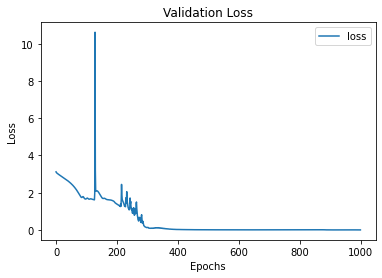

InvalidArgumentError: ignored

In [ ]:
#### First model ####

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
batch_size = 42
epochs = 50
timesteps = 4

inputs_1_mae = tf.keras.layers.Input(batch_shape=(batch_size, timesteps, 24))
lstm_1_mae = tf.keras.layers.LSTM(100, activation='tanh', stateful = True, return_sequences = True)(inputs_1_mae)
lstm_2_mae = tf.keras.layers.LSTM(100, activation='relu', stateful = True, return_sequences = True)(lstm_1_mae)
output_1_mae = tf.keras.layers.Dense (units = 24)(lstm_2_mae)
regressor_mae = tf.keras.Model(inputs= inputs_1_mae, outputs = output_1_mae)
#optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy', f1_score, precision, recall]
regressor_mae.compile (optimizer = "SGD", loss = "mse")
#regressor_mae.compile (optimizer = "rmsprop", loss='sparse_categorical_crossentropy')
#regressor_mae.compile (optimizer = "adam", loss = 'categorical_crossentropy')

regressor_mae.summary()
#regressor_mae.fit(padded_Ecodes, padded_Pcodes, epochs=50)
history = regressor_mae.fit(padded_Ecodes, padded_Pcodes, epochs=1000, batch_size = 42)
score = regressor_mae.evaluate(padded_Ecodes, padded_Pcodes, batch_size=42, verbose=0)
#score = regressor_mae.evaluate(padded_Ecodes, padded_Pcodes, verbose=0)

print(' Train loss:', score)
#plt.plot(history.history['loss'])
#plt.show()
pd.DataFrame(history.history).plot()
plt.title("Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(42, 4, 24)]             0         
                                                                 
 lstm_18 (LSTM)              (42, 4, 100)              50000     
                                                                 
 lstm_19 (LSTM)              (42, 4, 100)              80400     
                                                                 
 dense_9 (Dense)             (42, 4, 24)               2424      
                                                                 
Total params: 132,824
Trainable params: 132,824
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.1282 - mean_sq

1/1 [==============================] - 1s 552ms/step
Test loss: 1.6389901638031006
Mean Squared Error: 1.6389901638031006
Mean Absolute Error: 0.8852368593215942
Root Mean Squared Error: 1.2802305221557617
Mean Absolute Percentage Error: 453523840.0
Mean Absolute Error (MAE): 0.8910604
Mean Squared Error (MSE): 1.6476883
R^2 Score: -0.06276010363871824


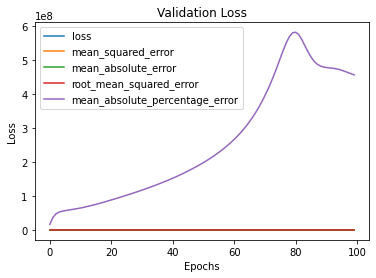

In [ ]:
!pip install keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# pad sequence
# English
padded_Ecodes = pad_sequences(Ecodes, padding='post', dtype='float32')
padded_EcodesP = padded_Ecodes
padded_EcodesP = padded_EcodesP.reshape(42, 3, 21)
padded_EcodesP = np.pad(padded_EcodesP, ((0, 0), (0, 1),(0, 3)))
padded_Ecodes = padded_EcodesP.reshape(42, 4, 24, 1)

# Persian
padded_Pcodes = pad_sequences(Pcodes, padding='post', dtype='float32')
padded_Pcodes = padded_Pcodes.reshape(42, 4, 24, 1)

# Define the model
batch_size = 42
epochs = 50
timesteps = 4
inputs = tf.keras.layers.Input(batch_shape=(batch_size, timesteps, 24))
lstm_1 = tf.keras.layers.LSTM(100, activation='tanh', stateful=True, return_sequences=True)(inputs)
lstm_2 = tf.keras.layers.LSTM(100, activation='relu', stateful=True, return_sequences=True)(lstm_1)
output = tf.keras.layers.Dense(units=24)(lstm_2)
regressor = tf.keras.Model(inputs=inputs, outputs=output)

# Compile the model with optimization algorithm, loss function, and evaluation metrics
regressor.compile(optimizer="SGD", loss="mse", metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()])

# Print the model summary
regressor.summary()

# Train the model and save the history of training
history = regressor.fit(padded_Ecodes, padded_Pcodes, epochs=100, batch_size=batch_size)

# Evaluate the model on the test data
score = regressor.evaluate(padded_Ecodes, padded_Pcodes, batch_size=batch_size, verbose=0)

# Compute additional evaluation metrics
y_true = padded_Pcodes.reshape(-1, 24)
y_pred = regressor.predict(padded_Ecodes, batch_size=42).reshape(-1, 24)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print("Test loss:", score[0])
print("Mean Squared Error:", score[1])
print("Mean Absolute Error:", score[2])
print("Root Mean Squared Error:", score[3])
print("Mean Absolute Percentage Error:", score[4])
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Plot the validation loss
pd.DataFrame(history.history).plot()
plt.title("Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


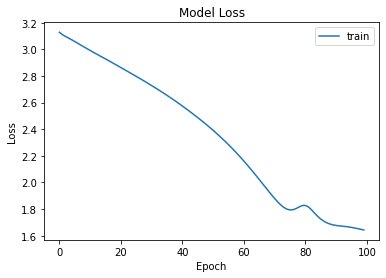

KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt

# plot the training and validation loss over each epoch
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.8813 - mse: 3.1502 - val_loss: 0.8735 - val_mse: 3.1338
Epoch 2/500
1/1 [==============================] - 0s 69ms/step - loss: 0.8735 - mse: 3.1380 - val_loss: 0.8680 - val_mse: 3.1253
Epoch 3/500
1/1 [==============================] - 0s 51ms/step - loss: 0.8680 - mse: 3.1295 - val_loss: 0.8649 - val_mse: 3.1190
Epoch 4/500
1/1 [==============================] - 0s 51ms/step - loss: 0.8649 - mse: 3.1232 - val_loss: 0.8632 - val_mse: 3.1128
Epoch 5/500
1/1 [==============================] - 0s 49ms/step - loss: 0.8633 - mse: 3.1170 - val_loss: 0.8615 - val_mse: 3.1085
Epoch 6/500
1/1 [==============================] - 0s 50ms/step - loss: 0.8615 - mse: 3.1127 - val_loss: 0.8595 - val_mse: 3.1054
Epoch 7/500
1/1 [==============================] - 0s 65ms/step - loss: 0.8595 - mse: 3.1096 - val_loss: 0.8583 - val_mse: 3.1031
Epoch 8/500
1/1 [==============================] - 0s 54ms/step - loss: 0.8583 - mse: 3.1073

1/1 [==============================] - 0s 37ms/step


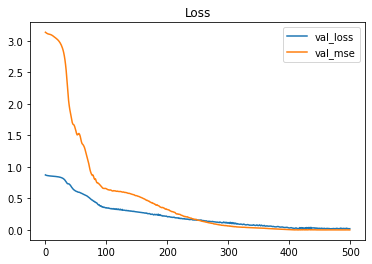

 Validation loss: [0.023092882707715034, 0.0018598355818539858]
['loss', 'mse']


In [ ]:
############Second model########################

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.layers import Activation, Dense, RepeatVector
from keras.layers import TimeDistributed
batch_size = 20
epochs = 10
timesteps = 4
X_train, X_test, y_train, y_test = train_test_split(padded_Ecodes, padded_Pcodes, test_size=0.33, random_state=42)
tf.keras.backend.clear_session()
model = keras.Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, 24)))
model.add(RepeatVector(4))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(24)))
#optimizer = "rmsprop", loss='sparse_categorical_crossentropy'
model.compile(optimizer='adam', loss='mae', metrics=['mse'])
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['mse'])
#model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=1)
score = model.evaluate(X_test, y_test, batch_size=20, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
history_dict = history.history
del history_dict['loss']
del history_dict['mse']
pd.DataFrame(history.history).plot()
plt.title("Loss")
plt.show()
print(' Validation loss:', score)
print(model.metrics_names)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the input and output sequences
input_seq = np.random.randn(100, 10, 1) # shape: (num_samples, sequence_length, input_dim)
output_seq = np.random.randn(100, 5, 1) # shape: (num_samples, output_sequence_length, output_dim)

# Define the LSTM model
model = Sequential()
#model.add(LSTM(64, input_shape=(10, 1))) # 64 is the number of hidden units in the LSTM layer
#model.add(Dense(5)) # 5 is the output sequence length
model.add(LSTM(64, input_shape=(4, 24))) # 64 is the number of hidden units in the LSTM layer
model.add(Dense(4)) # 5 is the output sequence length
model.compile(loss='mse', optimizer='adam')

#padded_Ecodes = padded_EcodesP.reshape(42, 4, 24, 1)
#padded_Pcodes = padded_Pcodes.reshape(42, 4, 24, 1)


# Train the model
#model.fit(input_seq, output_seq, epochs=50, batch_size=32)
model.fit(padded_Ecodes, padded_Pcodes, epochs=50)

# Generate predictions on new data
new_data = np.random.randn(1, 10, 1) # shape: (num_samples, sequence_length, input_dim)
preds = model.predict(new_data) # shape: (num_samples, output_sequence_length, output_dim)